<a href="https://colab.research.google.com/github/frnchskolymps/CCDATSCL_EXERCISES/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

<img src="https://vsqfvsosprmjdktwilrj.supabase.co/storage/v1/object/public/images/insights/1753644539114-netflix.jpeg"/>


In this activity , you will explore two fundamental preprocessing techniques used in data science and machine learning: feature scaling and discretization (binning).

These techniques are essential when working with datasets that contain numerical values on very different scales, or continuous variables that may be more useful when grouped into categories.


We will use a subset of the Netflix Movies and TV Shows dataset, which contains metadata such as release year, duration, ratings, and other attributes of titles currently or previously available on Netflix. Although the dataset is not originally designed for numerical modeling, it contains several features suitable for preprocessing practice—such as:
-Release Year
-Duration (in minutes)
-Number of Cast Members
-Number of Listed Genres
-Title Word Count

In this worksheet, you will:
- Load and inspect the dataset
- Select numerical features for scaling
- Apply different scaling techniques
- Min–Max Scaling
- Standardization
- Robust Scaling
- Perform discretization (binning)
- Equal-width binning
- Equal-frequency binning
- Evaluate how scaling affects machine learning performance, using a simple KNN

In [427]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## 1. Setup and Data Loading



Load the Netflix dataset into a DataFrame named df.

In [428]:

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)


if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows
True


## 2. Data Understanding

Store the dataset’s column names in a variable called cols.



In [429]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [431]:
cols = df.columns.tolist()

In [432]:
cols

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

Store the shape of the dataset as a tuple (rows, columns) in shape_info.

In [433]:
shape_info = df.shape

In [434]:
shape_info

(8807, 12)

## 3. Data Cleaning
Count missing values per column and save to missing_counts.

In [435]:
missing_counts = df.isna().sum()

In [436]:
missing_counts

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Drop rows where duration is missing. Save to df_clean.

In [437]:
df_clean = df.dropna(subset=['duration'])

In [438]:
df_clean['duration'].isna().sum()

np.int64(0)

4. Selecting Relevant Numeric Features

Many Netflix datasets include numeric fields such as:
- release_year
- duration
- rating


In [439]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [440]:
# estimate per season as 500 mins

duration_copy = df['duration']

# Extract the numeric part
df['duration'] = duration_copy.str.extract(r'(\d+)')[0].astype(float)

# Multiply by 500 if it was a TV show (contains 'Season'), otherwise leave as-is
df['duration'] *= np.where(duration_copy.str.contains('Season', na=False), 500, 1)

In [441]:
# separate duration into numeric by season and movie minutes:

# df['duration_min'] = df['duration'].str.extract('(\d+)(?=\s*min)').astype(float)
# df['duration_season'] = df['duration'].str.extract('(\d+)(?=\s*Season)').astype(float)

In [442]:
# df['duration_min'] = df['duration'].str.extract('(\d+)').astype(float) # duration has "min" word

Create a DataFrame `df_num` containing only numeric columns.

In [443]:
df_num = df.select_dtypes(include='number')

In [444]:
df_num.columns

Index(['release_year', 'duration'], dtype='object')

In [445]:
df_num.head()

,release_year,duration
0,2020,90.0
1,2021,1000.0
2,2021,500.0
3,2021,500.0
4,2021,1000.0


## 5. Feature Scaling

Focus on a single numeric column (e.g., duration).


Extract the column duration into a Series named `dur`.

In [446]:
dur = df['duration']

In [447]:
dur.head()

,duration
0,90.0
1,1000.0
2,500.0
3,500.0
4,1000.0


Apply Min–Max Scaling to `dur`. Store the result as `dur_minmax`.

In [448]:
scaler = MinMaxScaler()

dur_minmax = pd.Series(scaler.fit_transform(dur.values.reshape(-1, 1)).flatten())

In [449]:
dur_minmax.head()

,0
0,0.010239
1,0.117336
2,0.058491
3,0.058491
4,0.117336


Apply Z-score Standardization to `dur`. Store in `dur_zscore`.

In [450]:
scaler = StandardScaler()

dur_zscore = pd.Series(scaler.fit_transform(dur.values.reshape(-1, 1)).flatten())


In [451]:
dur_zscore.head()

,0
0,-0.437240
1,1.170126
2,0.286958
3,0.286958
4,1.170126


## 6. Discretization (Binning)
Apply equal-width binning to dur into 5 bins. Store as `dur_width_bins`.


- Use `pandas.cut()` to divide duration_minutes into 4 `equal-width bins`.
- Add the resulting bins as a new column named:
`duration_equal_width_bin`

In [452]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [453]:
df['duration_equal_width_bin'] = pd.cut(df['duration'], 4)  # automatically creates 4 bins
pd.value_counts(df['duration_equal_width_bin'])

/tmp/ipython-input-854606751.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['duration_equal_width_bin'])


,count
duration_equal_width_bin,
"(-5.497, 2127.25]",8640
"(2127.25, 4251.5]",138
"(4251.5, 6375.75]",20
"(6375.75, 8500.0]",6


In [454]:
# Define labels automatically for 4 bins
labels = ['Short', 'Medium', 'Long', 'Very Long']

df['duration_category'] = pd.cut(df['duration'], 4, labels=labels)
pd.value_counts(df['duration_category'])

/tmp/ipython-input-1290671691.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['duration_category'])


,count
duration_category,
Short,8640
Medium,138
Long,20
Very Long,6


Describe the characteristics of each bin

- What are the bin edges produced by equal-width binning?
- How many movies fall into each bin?

In [455]:
print("What are the bin edges produced by equal-width binning?")
pd.value_counts(df['duration_equal_width_bin'])

What are the bin edges produced by equal-width binning?


/tmp/ipython-input-251183291.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['duration_equal_width_bin'])


,count
duration_equal_width_bin,
"(-5.497, 2127.25]",8640
"(2127.25, 4251.5]",138
"(4251.5, 6375.75]",20
"(6375.75, 8500.0]",6


In [456]:
print("How many movies fall into each bin?")
pd.value_counts(df['duration_category'])

How many movies fall into each bin?


/tmp/ipython-input-4124859324.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['duration_category'])


,count
duration_category,
Short,8640
Medium,138
Long,20
Very Long,6


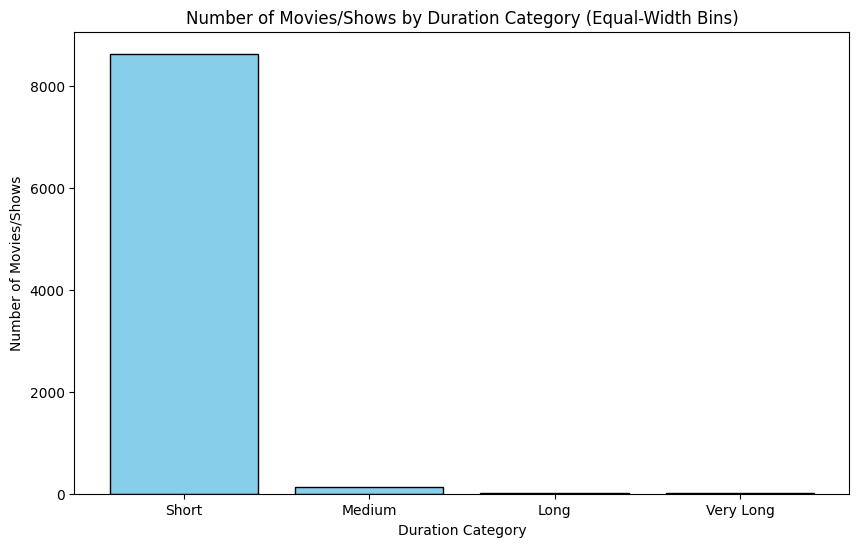

In [457]:
import matplotlib.pyplot as plt

# Count of movies/shows per category
counts = df['duration_category'].value_counts(sort=False)  # keep the order Short→Very Long

# Plot histogram as a bar chart
plt.figure(figsize=(10,6))
plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
plt.title('Number of Movies/Shows by Duration Category (Equal-Width Bins)')
plt.xlabel('Duration Category')
plt.ylabel('Number of Movies/Shows')
plt.show()


Apply equal-frequency binning to dur into 5 bins. Store as `dur_quantile_bins`.

- Use `pandas.qcut()` to divide duration_minutes into 4 equal-frequency bins.
- Add the result as a new column named:
`duration_equal_freq_bin`

In [458]:
dur = df['duration'] # extract the duration into series
dur_quantile_bins = pd.qcut(dur, 4) # apply the equal-frequency binning into 4 bins
dur_quantile_bins.head()


,duration
0,"(2.999, 92.0]"
1,"(500.0, 8500.0]"
2,"(112.0, 500.0]"
3,"(112.0, 500.0]"
4,"(500.0, 8500.0]"


In [459]:
df['duration_equal_freq_bin'] = pd.qcut(df['duration'], 4) # add the equal-frequency bins into new column
pd.value_counts(df['duration_equal_freq_bin'])

labels = ['Short', 'Medium', 'Long', 'Very Long'] # make it more readable
df['duration_equal_freq_category'] = pd.qcut(df['duration'], 4, labels=labels)
pd.value_counts(df['duration_equal_freq_category'], sort=False)

/tmp/ipython-input-3443360205.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['duration_equal_freq_bin'])
/tmp/ipython-input-3443360205.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['duration_equal_freq_category'], sort=False)


,count
duration_equal_freq_category,
Short,2263
Medium,2212
Long,3446
Very Long,883


Describe the characteristics of each bin

- What are the bin ranges produced by equal-frequency binning?
- How many movies fall into each bin? Are they nearly equal?

In [460]:
print("What are the bin ranges produced by equal-frequency binning?")
dur_quantile_bins.head()


What are the bin ranges produced by equal-frequency binning?


,duration
0,"(2.999, 92.0]"
1,"(500.0, 8500.0]"
2,"(112.0, 500.0]"
3,"(112.0, 500.0]"
4,"(500.0, 8500.0]"


In [461]:
print("How many movies fall into each bin? Are they nearly equal?")
pd.value_counts(df['duration_equal_freq_category'], sort=False)

How many movies fall into each bin? Are they nearly equal?


/tmp/ipython-input-4144498347.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['duration_equal_freq_category'], sort=False)


,count
duration_equal_freq_category,
Short,2263
Medium,2212
Long,3446
Very Long,883


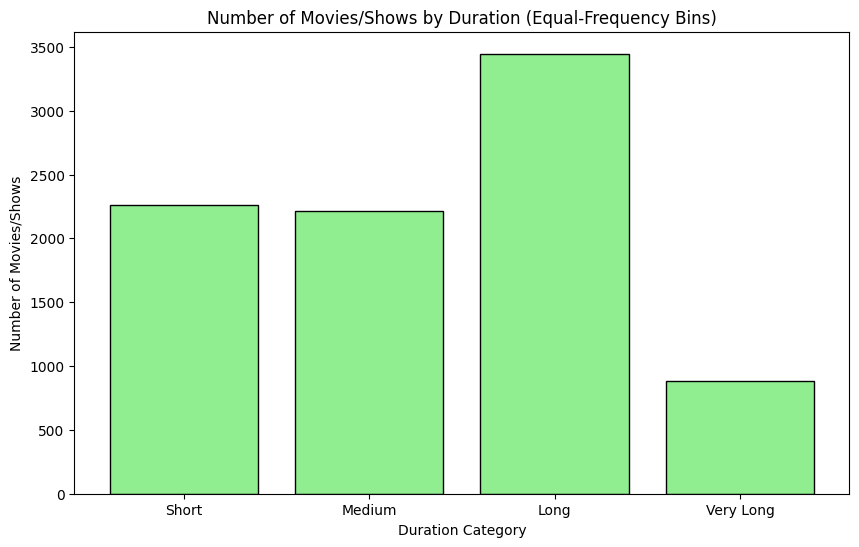

In [462]:
import matplotlib.pyplot as plt

# Count of movies/shows per equal-frequency category
counts = df['duration_equal_freq_category'].value_counts(sort=False)  # keep order Short→Very Long

# Plot histogram as a bar chart
plt.figure(figsize=(10,6))
plt.bar(counts.index, counts.values, color='lightgreen', edgecolor='black')
plt.title('Number of Movies/Shows by Duration (Equal-Frequency Bins)')
plt.xlabel('Duration Category')
plt.ylabel('Number of Movies/Shows')
plt.show()

## 7. KNN Before & After Scaling


Create a feature matrix X using any two numeric columns and a target y (e.g., classification by genre or type). Create a train/test split.

Train a KNN classifier without scaling. Store accuracy in acc_raw.

In [463]:
df['duration'].isna().sum()

np.int64(3)

In [464]:
df['release_year'].isna().sum()

np.int64(0)

In [465]:
df = df.dropna(subset=['duration'])

In [466]:
from sklearn.model_selection import train_test_split

# Features: numeric columns
X = df[['duration', 'release_year']]

# Target: classification by type (Movie/TV Show)
y = df['type']

# Train/test split (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN (default k=5)
knn = KNeighborsClassifier()

# Train
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Store accuracy
acc_raw = accuracy_score(y_test, y_pred)
acc_raw


1.0

Scale `X` using either Min–Max or Standardization, retrain KNN, and store accuracy in acc_scaled.

In [467]:
# scale

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [468]:
# Initialize KNN
knn_scaled = KNeighborsClassifier()

# Train on scaled data
knn_scaled.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Store scaled accuracy
acc_scaled = accuracy_score(y_test, y_pred_scaled)
acc_scaled


0.9988644965934897

Did scaling improve accuracy? Explain why.

In [469]:
print(f"Accuracy without scaling: {acc_raw:.4f}")
print(f"Accuracy with scaling:    {acc_scaled:.4f}")

Accuracy without scaling: 1.0000
Accuracy with scaling:    0.9989


In [471]:
print("Did scaling improve accuracy? Explain why.")

print("""The Scaling did not improve (but is slightly close to the without scaling) because KNN is a distance - based algorithm. it is usually used when the features are completely different on their scales.
In the current dataset, the duration can separate the movies and the tv shows alone so scaling is not that needed anymore.
""")

Did scaling improve accuracy? Explain why.
The Scaling did not improve (but is slightly close to the without scaling) because KNN is a distance - based algorithm. it is usually used when the features are completely different on their scales. 
In the current dataset, the duration can separate the movies and the tv shows alone so scaling is not that needed anymore. 

